
train.csv

*   id : 해당 데이터의 고유한 ID (train, test와의 중복은 없음)

*   date : 날짜

*   bus_route_id : 노선 id

*   in_out : 시내버스, 시외버스 구분 (categorical)

*   station_code : 해당 승하차 정류소의 ID

*   station_name : 해당 승하차 정류소의 이름

*   latitude : 해당 버스 정류장의 위도



**예측해야할 것 ==> 18~20시 사이의 승차인원**



bus_bts.csv

버스카드별로 승하차 정보 기록 되어 있음.
탑승시간대가 오전 6시부터 12시 사이인 경우만 있다.







In [303]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
bus = pd.read_csv('bus_bts.csv')
rain = pd.read_csv('jeju.csv', encoding='CP949')
rain_test=pd.read_csv('jeju_test.csv', encoding='CP949')
print(train.isnull().sum())
print('---------------------------------------')
print(test.isnull().sum())

id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
18~20_ride       0
dtype: int64
---------------------------------------
id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
dtype: int64


## **제주도 기상 파일**

https://data.kma.go.kr/stcs/grnd/grndRnList.do?pgmNo=69

2019.09.01~ 2019.09.30 ==> train
2019.10.01~ 2019.10.16 ==> test

.

**pd.merge(df1, df2, on='공통된 열')**

In [304]:
#제주 기온, 강수량 csv파일 합치기
rain = rain.rename({'날짜':'date', '강수량':'rain', '평균기온':'ondo'}, axis=1)
rain_test = rain_test.rename({'날짜':'date', '강수량':'rain', '평균기온':'ondo'}, axis=1)
train = pd.merge(rain, train, on='date')
test = pd.merge(rain_test, test, on='date')

In [305]:
test

,date,rain,ondo,id,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,2019-10-01,36.3,23.4,415423,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2019-10-01,36.3,23.4,415424,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-10-01,36.3,23.4,415425,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-10-01,36.3,23.4,415426,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-10-01,36.3,23.4,415427,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228165,2019-10-16,0.0,18.1,643588,32820000,시내,786,고산환승정류장(고산1리),33.30073,126.18044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
228166,2019-10-16,0.0,18.1,643589,32820000,시내,1080,애월고등학교,33.46262,126.33447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
228167,2019-10-16,0.0,18.1,643590,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228168,2019-10-16,0.0,18.1,643591,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [306]:
train['date'] = pd.to_datetime(train['date'])
train['day'] = train['date'].dt.day
test['date'] = pd.to_datetime(test['date'])
test['day'] = test['date'].dt.day


9월 주말/공휴일(추석) - 1
평일 - 0


In [307]:
train_list = [7, 8, 12, 13, 14, 15, 21, 22]
train['day'] = train['day'].apply(lambda x: 1 if x in train_list else 0)

test_list = [5, 6, 12, 13]
test['day'] = test['day'].apply(lambda x: 1 if x in test_list else 0)
train

,date,rain,ondo,id,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,day
0,2019-09-01,26.1,23.3,0,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2019-09-01,26.1,23.3,1,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0
2,2019-09-01,26.1,23.3,2,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
3,2019-09-01,26.1,23.3,3,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0
4,2019-09-01,26.1,23.3,4,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304872,2019-09-23,0.0,21.0,304872,28820000,시내,327,농협지역본부,33.50772,126.51982,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
304873,2019-09-23,0.0,21.0,304873,28820000,시내,328,제주중앙여자중학교,33.50553,126.51976,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
304874,2019-09-23,0.0,21.0,304874,28820000,시내,389,서문로터리,33.51173,126.51932,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
304875,2019-09-23,0.0,21.0,304875,28820000,시내,621,제주국제공항입구,33.50461,126.49647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [308]:
train = train.drop(['date','id','station_code','station_name'], axis=1)
test = test.drop(['date','id','station_code', 'station_name'], axis=1)

In [309]:
train['bus_route_id'] = train['bus_route_id']/10000
test['bus_route_id'] = test['bus_route_id']/10000

In [310]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304877 entries, 0 to 304876
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   rain           304877 non-null  float64
 1   ondo           304877 non-null  float64
 2   bus_route_id   304877 non-null  float64
 3   in_out         304877 non-null  object 
 4   latitude       304877 non-null  float64
 5   longitude      304877 non-null  float64
 6   6~7_ride       304877 non-null  float64
 7   7~8_ride       304877 non-null  float64
 8   8~9_ride       304877 non-null  float64
 9   9~10_ride      304877 non-null  float64
 10  10~11_ride     304877 non-null  float64
 11  11~12_ride     304877 non-null  float64
 12  6~7_takeoff    304877 non-null  float64
 13  7~8_takeoff    304877 non-null  float64
 14  8~9_takeoff    304877 non-null  float64
 15  9~10_takeoff   304877 non-null  float64
 16  10~11_takeoff  304877 non-null  float64
 17  11~12_takeoff  304877 non-nul

열 축소
- 두시간씩 묶어줘보기

In [311]:
train['6~8_ride'] = train['6~7_ride'] + train['7~8_ride']
train['8~10_ride'] = train['8~9_ride'] + train['9~10_ride']
train['10~12_ride'] = train['10~11_ride'] + train['11~12_ride']
train['6~8_takeoff'] = train['6~7_takeoff'] + train['7~8_takeoff']
train['8~10_takeoff'] = train['8~9_takeoff'] + train['9~10_takeoff']
train['10~12_takeoff'] = train['10~11_takeoff'] + train['11~12_takeoff']
train = train.drop(['6~7_ride', '7~8_ride','8~9_ride','9~10_ride',
                    '10~11_ride','11~12_ride','6~7_takeoff','7~8_takeoff',
                    '8~9_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff'], axis=1)

test['6~8_ride'] = test['6~7_ride'] + test['7~8_ride']
test['8~10_ride'] = test['8~9_ride'] + test['9~10_ride']
test['10~12_ride'] = test['10~11_ride'] + test['11~12_ride']
test['6~8_takeoff'] = test['6~7_takeoff'] + test['7~8_takeoff']
test['8~10_takeoff'] = test['8~9_takeoff'] + test['9~10_takeoff']
test['10~12_takeoff'] = test['10~11_takeoff'] + test['11~12_takeoff']
test = test.drop(['6~7_ride', '7~8_ride','8~9_ride','9~10_ride',
                    '10~11_ride','11~12_ride','6~7_takeoff','7~8_takeoff',
                    '8~9_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff'], axis=1)

In [312]:
test

,rain,ondo,bus_route_id,in_out,latitude,longitude,day,6~8_ride,8~10_ride,10~12_ride,6~8_takeoff,8~10_takeoff,10~12_takeoff
0,36.3,23.4,427.0,시외,33.48990,126.49373,0,8.0,9.0,10.0,0.0,0.0,1.0
1,36.3,23.4,427.0,시외,33.48944,126.48508,0,7.0,7.0,19.0,0.0,0.0,0.0
2,36.3,23.4,427.0,시외,33.48181,126.47352,0,6.0,4.0,3.0,0.0,0.0,0.0
3,36.3,23.4,427.0,시내,33.50577,126.49252,0,12.0,26.0,46.0,0.0,0.0,0.0
4,36.3,23.4,427.0,시내,33.24872,126.41032,0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228165,0.0,18.1,3282.0,시내,33.30073,126.18044,0,0.0,0.0,0.0,3.0,0.0,0.0
228166,0.0,18.1,3282.0,시내,33.46262,126.33447,0,0.0,0.0,0.0,1.0,0.0,0.0
228167,0.0,18.1,3282.0,시내,33.41437,126.26336,0,3.0,0.0,0.0,0.0,0.0,0.0
228168,0.0,18.1,3282.0,시내,33.49946,126.51479,0,3.0,0.0,0.0,0.0,0.0,0.0


In [313]:
#라벨링
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['in_out'] = le.fit_transform(train['in_out'])
test['in_out'] = le.transform(test['in_out'])


In [314]:
train.corr()['18~20_ride'].sort_values()

bus_route_id    -0.141254
rain            -0.041070
day             -0.027841
longitude       -0.021797
ondo            -0.000242
in_out           0.022337
latitude         0.078117
6~8_takeoff      0.249039
8~10_takeoff     0.326794
10~12_takeoff    0.338378
6~8_ride         0.396333
8~10_ride        0.535864
10~12_ride       0.615615
18~20_ride       1.000000
Name: 18~20_ride, dtype: float64

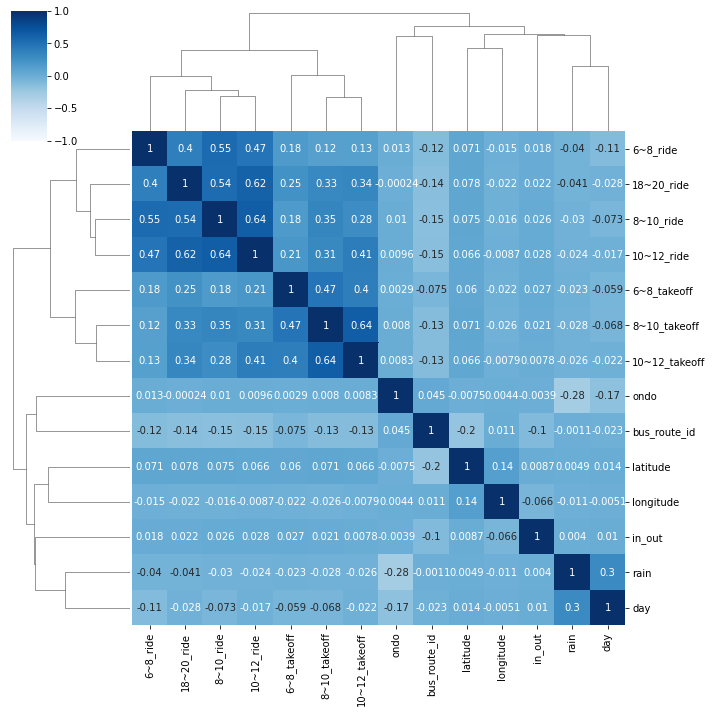

In [315]:
#heatmap 그리기

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10,8]

corr = train.corr()
sns.clustermap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)

In [316]:
x_train = train.drop(['18~20_ride'],axis=1)
y_train = train['18~20_ride']
x_test = test

print(x_train)
print(y_train)
print(x_test)

        rain  ondo  bus_route_id  ...  6~8_takeoff  8~10_takeoff  10~12_takeoff
0       26.1  23.3         427.0  ...          0.0           0.0            0.0
1       26.1  23.3         427.0  ...          0.0           0.0            0.0
2       26.1  23.3         427.0  ...          0.0           0.0            0.0
3       26.1  23.3         427.0  ...          0.0           0.0            0.0
4       26.1  23.3         427.0  ...          0.0           1.0            0.0
...      ...   ...           ...  ...          ...           ...            ...
304872   0.0  21.0        2882.0  ...          0.0           1.0            0.0
304873   0.0  21.0        2882.0  ...          0.0           2.0            0.0
304874   0.0  21.0        2882.0  ...          0.0           0.0            0.0
304875   0.0  21.0        2882.0  ...          0.0           1.0            0.0
304876   0.0  21.0        2882.0  ...          0.0           0.0            0.0

[304877 rows x 13 columns]
0          0

In [317]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train

array([[ 0.15153667, -0.61291162, -5.74253551, ..., -0.29919254,
        -0.35382746, -0.32217861],
       [ 0.15153667, -0.61291162, -5.74253551, ..., -0.29919254,
        -0.35382746, -0.32217861],
       [ 0.15153667, -0.61291162, -5.74253551, ..., -0.29919254,
        -0.35382746, -0.32217861],
       ...,
       [-0.57410981, -1.90069941,  0.50725258, ..., -0.29919254,
        -0.35382746, -0.32217861],
       [-0.57410981, -1.90069941,  0.50725258, ..., -0.29919254,
         0.02722702, -0.32217861],
       [-0.57410981, -1.90069941,  0.50725258, ..., -0.29919254,
        -0.35382746, -0.32217861]])

PCA 차원축소 시도 ==> 결과 더 안 좋아짐

In [318]:

#from sklearn.decomposition import PCA
#
#pca = PCA(n_components=8).fit(x_train)
#
#x_train = pca.transform(x_train)
#x_test = pca.transform(x_test)

In [319]:
x_train.shape

(304877, 13)

In [326]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

train = lgb.Dataset(x_train, label=y_train)

params={'learning_rate':0.08,
       'max_depth' : 25,
       'boosting' : 'gbdt',
       'objective' : 'regression',
       'metric' : 'rmse'}

model = lgb.train(params, train, 1000)

train_pred = model.predict(x_train)

print(mean_squared_error(y_train,train_pred))

3.261192019870862


In [327]:
predict = model.predict(x_test)

predict

array([13.20227365, 15.40698097,  2.87752651, ..., -0.10242121,
        0.06735488,  0.02922773])

In [324]:
submit = pd.read_csv('submission_sample.csv')

for i in range(len(predict)):
  submit['18~20_ride'][i] = predict[i].astype(int)

submit.to_csv('submission.csv', index=False, header=True)

#2.9136

In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.metrics import mean_squared_error

# linear = AdaBoostRegressor()

# linear.fit(x_train, y_train)
# train_predict = linear.predict(x_train)

# print(mean_squared_error(y_train, train_predict))



In [ ]:
# train_station_list = train['station_name'].unique()
# test_station_list = test['station_name'].unique()
# not_in_list=[]
# #not_in_list = set(train_station_list)- set(test_station_list)
# #
# #for i in train_station_list:
# #  if i not in test_station_list:
# #    not_in_list.append(i)
# #    
# #for i in test_station_list:
# #  print(i)
# #  if i not in train_station_list:
# #    not_in_list.append(i)
# #
# print(train_station_list)
# print(test_station_list)
# print(not_in_list)


In [ ]:
# drop_station_list = ['화랑마을', '진군을리', '함덕초등학교', '동일2리입구', '위미정수장', '도순초등학교', '새소망요양병원', '덕천상하동', '한울랜드', '유수암리입구', '예초', '추자교', '모진이작지해수욕장입구', '추자119지역센터', '강화교', '예래초등학교', '대림동']
# train = train.drop()(lambda x: 1 if x in train_list else 0)
